In [24]:
from keras.datasets import imdb
from keras import preprocessing
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding, SimpleRNN, LSTM
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_accuracy( history ):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize = (12, 6))
    plt.plot(epochs, acc, 'b', label = 'Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
    plt.legend()

def plot_loss(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    plt.figure(figsize = (12, 6))
    epochs = range(1, len(loss) + 1)
    plt.plot(epochs, loss, 'b', label = 'Training Loss')
    plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
    plt.legend()
          

## Using NN on Pre-Loaded IMDB DATA

#### Load IMDB data

In [5]:
max_features = 10000
maxlen = 1000
def get_pre_loaded_data(max_features, maxlen):
    #max_features:Max Number of words to use  
    # maxlen: Number of words to pick from text
    (X_train, y_train), (X_test, y_test) = imdb.load_data( num_words= max_features)
    print('Train Shape {}, Test Shape{}'.format(X_train.shape, X_test.shape))

    #Take only first maxlen words from review
    X_train = pad_sequences(X_train, maxlen = maxlen)
    X_test =  pad_sequences(X_test, maxlen = maxlen)
    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = get_pre_loaded_data(max_features, maxlen)

Train Shape (25000,), Test Shape(25000,)


#### Use Embeding layer

In [6]:
model = Sequential()
model.add(Embedding(max_features, 16, input_length = maxlen))
model.add(Flatten())
model.add(Dense(1, activation= 'sigmoid'))
model.compile(optimizer='rmsprop', loss = 'binary_crossentropy', metrics =['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1000, 16)          160000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 16001     
Total params: 176,001
Trainable params: 176,001
Non-trainable params: 0
_________________________________________________________________


In [7]:
history = model.fit( X_train,
                     y_train,
                     epochs = 20,
                     batch_size = 32,
                     validation_split = 0.2
                    
                 )

Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 4s 224us/step - loss: 0.5266 - acc: 0.7430 - val_loss: 0.3399 - val_acc: 0.8572
Epoch 2/20
20000/20000 [==============================] - 5s 246us/step - loss: 0.2583 - acc: 0.8985 - val_loss: 0.2754 - val_acc: 0.8896
Epoch 3/20
20000/20000 [==============================] - 4s 219us/step - loss: 0.1883 - acc: 0.9283 - val_loss: 0.2742 - val_acc: 0.8912
Epoch 4/20
20000/20000 [==============================] - 5s 238us/step - loss: 0.1459 - acc: 0.9469 - val_loss: 0.2799 - val_acc: 0.8918
Epoch 5/20
20000/20000 [==============================] - 5s 252us/step - loss: 0.1141 - acc: 0.9606 - val_loss: 0.2949 - val_acc: 0.8918
Epoch 6/20
20000/20000 [==============================] - 6s 279us/step - loss: 0.0886 - acc: 0.9713 - val_loss: 0.3132 - val_acc: 0.8928
Epoch 7/20
20000/20000 [==============================] - 5s 247us/step - loss: 0.0670 - acc: 0.9792 - val_loss: 0.3364 - v

##### plot accuracy and loss

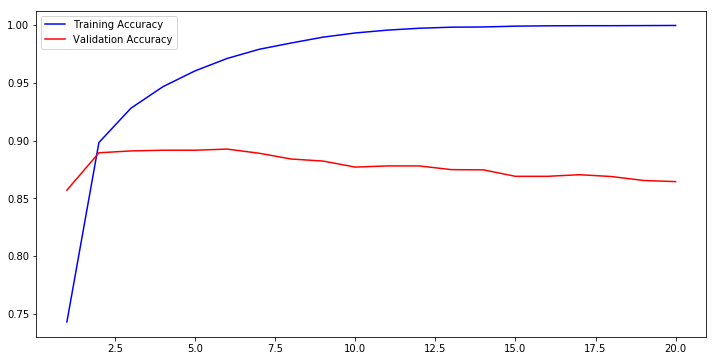

In [8]:
plot_accuracy(history)
plt.show()

## Using Pre-Trained Embedding on Raw Data

##### Read Traning review files  and Labels into list

In [ ]:
imdb_dir = 'C:\\Users\\I056036\Documents\\Docs\Development\\Tutorials\\Keras\\RNN-IMDB\\aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

def get_data_from_files(dir):
    labels = []
    texts = []

    for label_type in ['neg', 'pos']:
        dir_name = os.path.join(dir, label_type)
        for fname in os.listdir(dir_name):
           if fname[-4:] == '.txt':         
              f = open(os.path.join(dir_name, fname), encoding="utf8")
              texts.append(f.read())
              f.close()
           if label_type == 'neg':
               labels.append(0)
           else:
                labels.append(1)
    return texts, labels

texts, labels = get_data_from_files(train_dir) 
print('Text size {}, Labels Size {}'.format(len(texts), len(labels)))           

#### Tokenizing of Raw data

In [ ]:
#texts = ['My name is Ajay Rawat', 'His Name is Vijay', 'Her Name is Pooja', 'Pooja has a cat', 'ajay goes to school']
maxlen = 1000   #Review lenght in words
training_samples = 15000 #Number of samples to train on
validation_samples = 10000
max_words = 20000 #top number of words in sample

tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts) # Craete a numneric array for text array
word_index = tokenizer.word_index  #Mapping of all word to number ignoring num_words
print('Found %s unique token' % len(word_index))

data = pad_sequences(sequences, maxlen = maxlen) #Fill with zeroes so that lenght is same for all text in list
labels = np.asarray(labels)



#Shuffle data and lables
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

#Create training and Validatin data
X_train = data[:training_samples]
y_train  = labels[:training_samples]
X_valid =  data[training_samples: training_samples + validation_samples]
y_valid  =     labels[training_samples: training_samples + validation_samples]
print('Training Shape {} validation Shape{}'.format(X_train.shape, X_valid.shape))

#### Parsing Glove Embedding  
<br> Create a dictionary of words and numercal coefiicients
<br>https://nlp.stanford.edu/projects/glove/ 
<br>file glove.6B.zip

In [ ]:
glove_dir = 'C:\\Users\\I056036\\Documents\\Docs\\Development\\Tutorials\\Keras\\RNN-IMDB\\glove.6B'
embedding_index = {}

#Use 100 dimensional embedding vectors for 40K words
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'), encoding='utf8')  
for line in f:
   values = line.split()
   word = values[0]
   coefs = np.asarray(values[1:], dtype = 'float32')
   embedding_index[word]  = coefs

f.close()    
print('Found %s word vectors' %len(embedding_index))


#### Build embedding matrix of shape (max_words, embedding_dim)


In [ ]:
# Create embedding matrix for top words that were found in text 
#If the word in text is not found in pre-trained emebdding then it will be set as zero
embedding_dim = 100
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

embedding_matrix.shape

#### Create a model

In [ ]:
def get_model():
    model = Sequential()
    model.add(Embedding(max_words, embedding_dim, input_length = maxlen))
    model.add(Flatten())

    model.add(Dense(32, activation= 'relu'))
    model.add(Dense(1, activation= 'sigmoid'))

    model.compile(optimizer='rmsprop', loss = 'binary_crossentropy', metrics =['acc'])
    return model

#### Load pretranied word embeddings into emebedding layer

In [ ]:
model = get_model()
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

####  Train and Evalute

In [ ]:
model.compile(optimizer='rmsprop', loss = 'binary_crossentropy', metrics =['acc'])
history = model.fit(X_train,
                    y_train,
                    epochs = 3,
                   batch_size = 32,
                   validation_data = (X_valid, y_valid)
                   )

#### Plot Accuracy and Loss

In [ ]:
plot_accuracy(history)
plt.show()

#### Evalute on test set

In [ ]:
def evalaute_test_set(model):
    test_dir = os.path.join(imdb_dir, 'train')
    texts, labels = get_data_from_files(test_dir)
    print('Text size {}, Labels Size {}'.format(len(texts), len(labels)))  
    sequences = tokenizer.texts_to_sequences(texts)
    X_test = pad_sequences(sequences, maxlen = maxlen)
    y_test = np.asarray(labels)

    loss, acc = model.evaluate(X_test, y_test)
    print('Loss={}, Accuracy = {}'.format(loss, acc))
    
evalaute_test_set(model)    

#### Evaluate on sample review

In [ ]:
def evalaute_sample(model):
    texts = []
    new_review_file = 'C:\\Users\\I056036\\Documents\\Docs\\Development\\Tutorials\\Keras\\RNN-IMDB\\aclImdb\\new\\test.txt'
    f = open(new_review_file, encoding="utf8")
    texts.append(f.read())
    f.close()
    print(texts)
    sequences = tokenizer.texts_to_sequences(texts)
    X_test = pad_sequences(sequences, maxlen = maxlen)
    acc =model.predict_classes(X_test)
    return acc

evalaute_sample(model)   

## Train Without Pre-Trained Embeddding

In [ ]:
model = get_model()
history = model.fit(X_train,
                    y_train,
                    epochs = 3,
                   batch_size = 32,
                   validation_data = (X_valid, y_valid)
                   )

In [ ]:
plot_accuracy(history)
plt.show()

In [ ]:
evalaute_test_set(model) 

#### Evaluate on a sample review

In [ ]:

evalaute_sample(model)   

## Using SImple RNN

In [9]:
max_features = 10000
maxlen = 1000
bacth_size  = 32
X_train, y_train, X_test, y_test = get_pre_loaded_data(max_features, maxlen)

Train Shape (25000,), Test Shape(25000,)


In [20]:
def get_model_simple_rnn():
    model = Sequential()
    model.add(Embedding(max_features, 32))
    model.add(SimpleRNN(32))
    model.add(Dense(1, activation= 'sigmoid'))

    model.compile( optimizer= 'rmsprop',
                   loss = 'binary_crossentropy',
                   metrics = ['acc']
                 )
    return model

In [22]:
model = get_model_simple_rnn()
history = model.fit(X_train,
                    y_train,
                    epochs = 10,
                    batch_size = 128,
                    validation_split = 0.2
                    )

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 48s 2ms/step - loss: 0.6616 - acc: 0.5876 - val_loss: 0.5644 - val_acc: 0.7160
Epoch 2/10
20000/20000 [==============================] - 49s 2ms/step - loss: 0.4315 - acc: 0.8124 - val_loss: 0.4900 - val_acc: 0.7858
Epoch 3/10
20000/20000 [==============================] - 49s 2ms/step - loss: 0.3195 - acc: 0.8708 - val_loss: 0.3660 - val_acc: 0.8504
Epoch 4/10
20000/20000 [==============================] - 48s 2ms/step - loss: 0.2570 - acc: 0.8957 - val_loss: 0.4457 - val_acc: 0.7952
Epoch 5/10
20000/20000 [==============================] - 49s 2ms/step - loss: 0.2169 - acc: 0.9140 - val_loss: 0.5128 - val_acc: 0.7728
Epoch 6/10
20000/20000 [==============================] - 52s 3ms/step - loss: 0.2583 - acc: 0.8900 - val_loss: 0.4771 - val_acc: 0.8466
Epoch 7/10
20000/20000 [==============================] - 47s 2ms/step - loss: 0.1339 - acc: 0.9517 - val_loss: 0.4427 - val_acc:

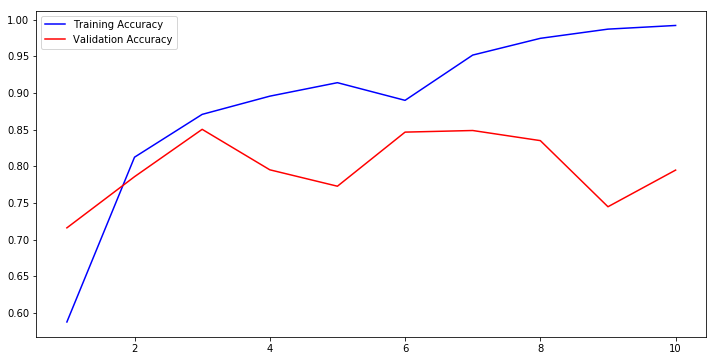

In [23]:
plot_accuracy(history)

## Using LSTM

In [25]:
def get_model_lstm_rnn():
    model = Sequential()
    model.add(Embedding(max_features, 32))
    model.add(LSTM(32))
    model.add(Dense(1, activation= 'sigmoid'))

    model.compile( optimizer= 'rmsprop',
                   loss = 'binary_crossentropy',
                   metrics = ['acc']
                 )
    return model

In [28]:
model = get_model_lstm_rnn()
history = model.fit(X_train,
                    y_train,
                    epochs = 20,
                    batch_size = 128,
                    validation_split = 0.2
                    )

Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 140s 7ms/step - loss: 0.5187 - acc: 0.7583 - val_loss: 0.3488 - val_acc: 0.8668
Epoch 2/20
20000/20000 [==============================] - 146s 7ms/step - loss: 0.3063 - acc: 0.8787 - val_loss: 0.3500 - val_acc: 0.8568
Epoch 3/20
20000/20000 [==============================] - 140s 7ms/step - loss: 0.2396 - acc: 0.9102 - val_loss: 0.4108 - val_acc: 0.8530
Epoch 4/20
20000/20000 [==============================] - 139s 7ms/step - loss: 0.2002 - acc: 0.9258 - val_loss: 0.2853 - val_acc: 0.8776
Epoch 5/20
20000/20000 [==============================] - 141s 7ms/step - loss: 0.1754 - acc: 0.9366 - val_loss: 0.3001 - val_acc: 0.8934
Epoch 6/20
20000/20000 [==============================] - 140s 7ms/step - loss: 0.1599 - acc: 0.9429 - val_loss: 0.3325 - val_acc: 0.8674
Epoch 7/20
20000/20000 [==============================] - 142s 7ms/step - loss: 0.1481 - acc: 0.9489 - val_loss: 0.3646 - v

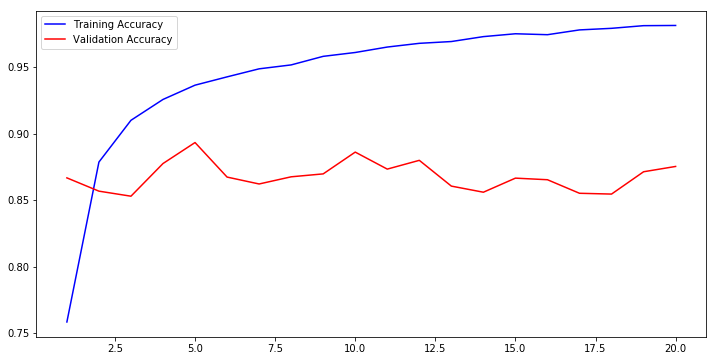

In [30]:
plot_accuracy(history)